# Demo 10.28.2017

Current functionality of API

    correlation
    covariance
    histogram
    
Demo conducted in Python 3.6.

In [1]:
import requests
import pandas as pd
import ast
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Correlation coefficient between 2 columns in a table.
    @app.route("/api/correlation/<col1>/<col2>")

In [2]:
col1 = 'o.numunits'
col2 = 'p.productid'
url = 'http://45.79.91.219/api/correlation/'+col1+'/'+col2
response = requests.get(url)
print('Correlation: ', response.text)

Correlation:  0.00643616130792


### Covariance coefficient between 2 columns in a table.
    @app.route("/api/covariance/<col1>/<col2>")

In [3]:
col1 = 'o.numunits'
col2 = 'p.productid'
url = 'http://45.79.91.219/api/covariance/'+col1+'/'+col2
response = requests.get(url)
print('Covariance: ', response.text)

Covariance:  93.5788384664


### Simple Histogram
    @app.route("/api/histogram/<groupby>/<count>")

In [4]:
groupby = 'state'
count = 'customerid'
url = 'http://45.79.91.219/api/histogram/'+groupby+'/'+count
response = requests.get(url)
data = ast.literal_eval(response.text)
print(data)

[{'Count': 53537, 'Group': 'NY'}, {'Count': 21274, 'Group': 'NJ'}, {'Count': 17839, 'Group': 'CA'}, {'Count': 10185, 'Group': 'FL'}, {'Count': 9369, 'Group': 'CT'}, {'Count': 7079, 'Group': 'PA'}, {'Count': 6942, 'Group': 'MA'}, {'Count': 6247, 'Group': 'TX'}, {'Count': 5812, 'Group': 'IL'}, {'Count': 4174, 'Group': 'VA'}, {'Count': 3963, 'Group': 'MD'}, {'Count': 3922, 'Group': 'OH'}, {'Count': 3807, 'Group': 'MI'}, {'Count': 3072, 'Group': 'WA'}, {'Count': 2865, 'Group': 'GA'}, {'Count': 2438, 'Group': 'NC'}, {'Count': 2275, 'Group': 'AZ'}, {'Count': 2165, 'Group': 'CO'}, {'Count': 1969, 'Group': 'DC'}, {'Count': 1877, 'Group': 'MN'}, {'Count': 1721, 'Group': 'WI'}, {'Count': 1512, 'Group': 'MO'}, {'Count': 1378, 'Group': 'OR'}, {'Count': 1283, 'Group': 'IN'}, {'Count': 1174, 'Group': 'TN'}, {'Count': 1119, 'Group': ''}, {'Count': 1002, 'Group': 'ON'}, {'Count': 987, 'Group': 'RI'}, {'Count': 912, 'Group': 'SC'}, {'Count': 811, 'Group': 'VT'}, {'Count': 790, 'Group': 'ME'}, {'Count':

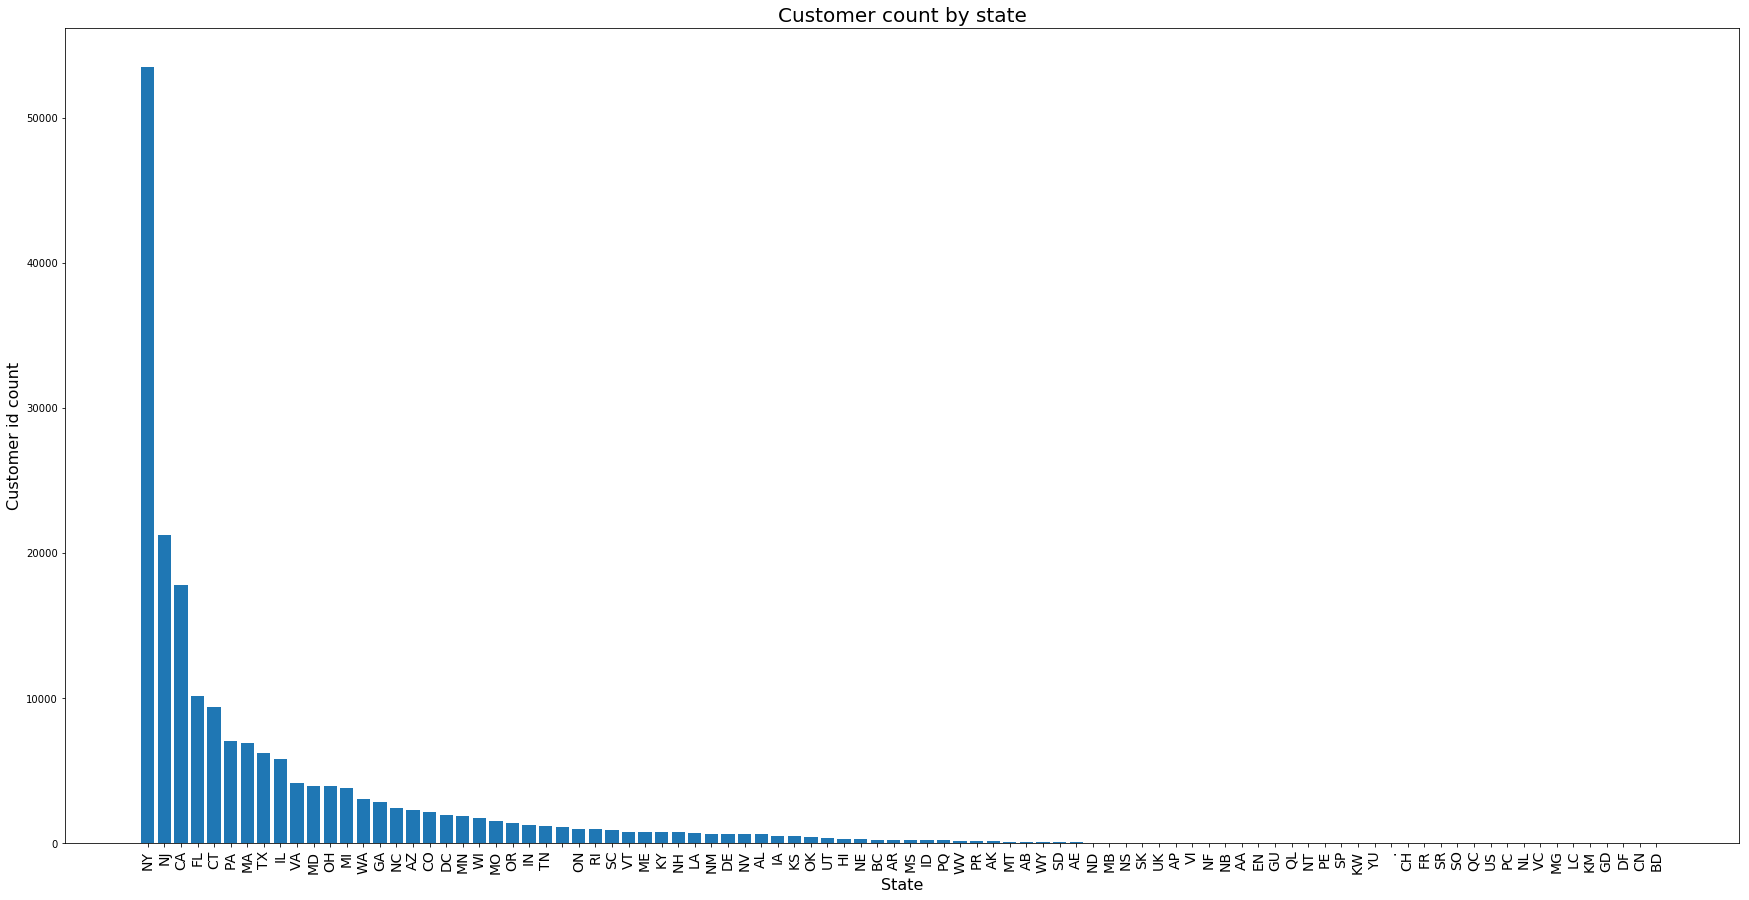

In [5]:
df = pd.DataFrame(data)
x = np.array(range(len(df['Group'])))
y = np.array(df['Count'])
my_xticks = list(df['Group'])
plt.figure(figsize=[30,15])
plt.xticks(x, my_xticks, fontsize=14, rotation='vertical')
plt.bar(x, y)
plt.title('Customer count by state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Customer id count', fontsize=16);